# Exploratory Data Analysis on the EEG motor movement/imagery dataset
This data set consists of over 1500 one- and two-minute EEG recordings, obtained from 109 volunteers.

Each volunteers' recordings are in separate numbered folders (S001 to S109) and each folder contains 14 recordings, which are described as follows:
1. Baseline, eyes open
2. Baseline, eyes closed
3. Task 1 (open and close left or right fist)
4. Task 2 (imagine opening and closing left or right fist)
5. Task 3 (open and close both fists or both feet)
6. Task 4 (imagine opening and closing both fists or both feet)
7. Task 1
8. Task 2
9. Task 3
10. Task 4
11. Task 1
12. Task 2
13. Task 3
14. Task 4

Each annotation includes one of three codes (T0, T1, or T2):

- T0 corresponds to rest
- T1 corresponds to onset of motion (real or imagined) of
the left fist (in runs 3, 4, 7, 8, 11, and 12)
both fists (in runs 5, 6, 9, 10, 13, and 14)
- T2 corresponds to onset of motion (real or imagined) of
the right fist (in runs 3, 4, 7, 8, 11, and 12)
both feet (in runs 5, 6, 9, 10, 13, and 14)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mne
import os
import glob

## Data Loading
Each recording contains two files, one in .edf format that contains the signals and the annotations, and one in .edf.events format that contains the data of the external events during the experiment.

In [2]:
data_dir = 'eeg-motor-movementimagery-dataset-1.0.0/files'
edf_files = [glob.glob(os.path.join(data_dir, subject, '*.edf')) for subject in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, subject))]
edf_files = sorted(edf_files)

event_files = [glob.glob(os.path.join(data_dir, subject, '*.edf.event')) for subject in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, subject))]
event_files = sorted(event_files)

print(f"Found {len(edf_files)} subjects, each with {len(edf_files[0])} EEG data files, total {sum(len(files) for files in edf_files)}.")
print(f"Found {sum(len(files) for files in event_files)} event files.")

Found 109 subjects, each with 14 EEG data files, total 1526.
Found 1526 event files.


Extracting EDF parameters from c:\Users\souna\OneDrive\Desktop\My folders\ML_projects\BTP2\eeg-motor-movementimagery-dataset-1.0.0\files\S001\S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


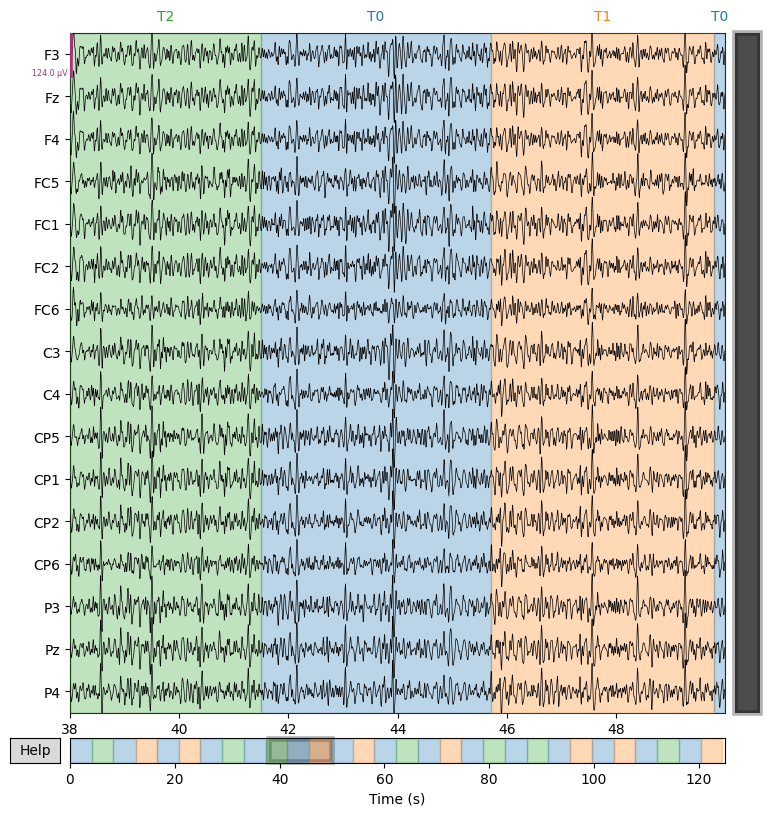

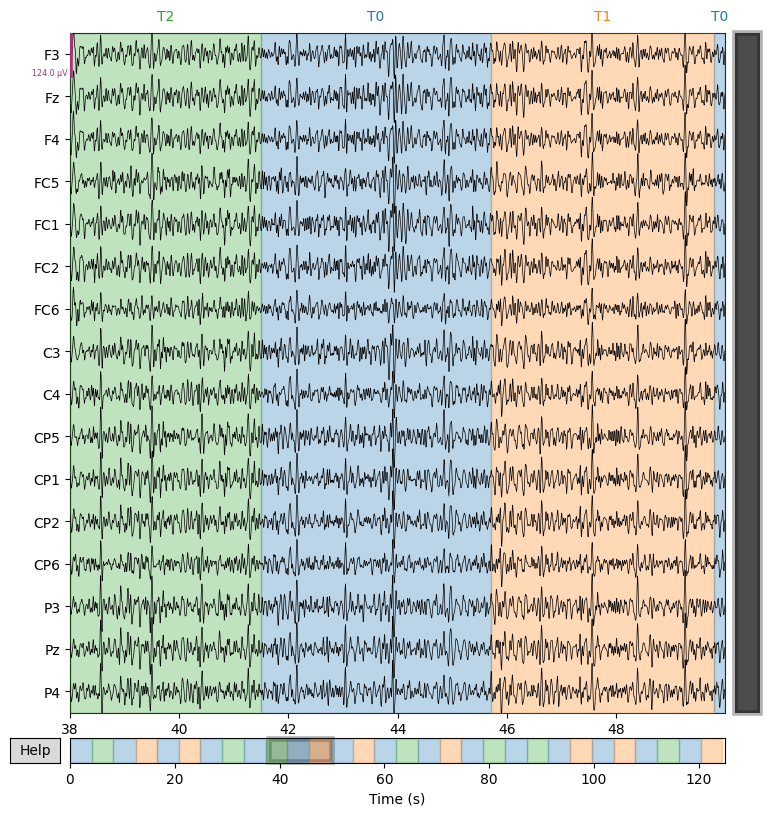

In [3]:
raw = mne.io.read_raw_edf(edf_files[0][2], preload=True)
mne.datasets.eegbci.standardize(raw)
raw.filter(7., 30., fir_design='firwin', skip_by_annotation='edge', verbose=False)
raw.pick(['F3', 'Fz', 'F4', 'FC5', 'FC1', 'FC2', 'FC6', 'C3', 'C4', 'CP5', 'CP1', 'CP2', 'CP6', 'P3', 'Pz', 'P4'], verbose=False)
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)
raw.plot(scalings={'eeg': 62e-6}, show_scrollbars=True, title='Raw EEG Data', start=38, duration=12, verbose=False)

### Utilities
- **set_montage()**: Sets the montage of the raw edf file. The documentation of the data suggests that the EEGs were recorded from 64 electrodes as per the international 10-10 system (excluding electrodes Nz, F9, F10, FT9, FT10, A1, A2, TP9, TP10, P9, and P10). Here we have set it to `standard_005`.
- **plot_raw()**: Applies a low pass firwin filter to the signal for better visualization and plots it.  

In [4]:
def set_montage(raw):
    """Set montage for the raw data."""
    raw.rename_channels(lambda x: x.strip('.').upper())
    raw.rename_channels({'FCZ': 'FCz', 'CZ': 'Cz', 'CPZ': 'CPz', 'FP1': 'Fp1', 'FPZ': 'Fpz', 'FP2': 'Fp2', 'AFZ': 'AFz', 'FZ': 'Fz', 'PZ': 'Pz', 'POZ': 'POz', 'OZ': 'Oz', 'IZ': 'Iz'})
    montage = mne.channels.make_standard_montage('standard_1005')
    raw.set_montage(montage)
    return raw

def plot_raw(raw):
    """Plot the raw data."""
    raw_filt = raw.copy().filter(1., 40., fir_design='firwin')
    raw_filt.plot(duration=10, n_channels=20, title="EEG Signals (First 20 Channels)", scalings='auto')

## Subject 1
Below has been shown the results of recording signals of subject 1 for 3 events: rest, moving left and right fists, and moving both fists and feet

### Baseline event (subject is asked to rest)

In [5]:
raw_1_1 = mne.io.read_raw_edf(edf_files[0][0], preload=True)
raw_1_1 = set_montage(raw_1_1)

Extracting EDF parameters from c:\Users\souna\OneDrive\Desktop\My folders\ML_projects\BTP2\eeg-motor-movementimagery-dataset-1.0.0\files\S001\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


#### Plotting the EEG signals of first 20 channels during the first 10 seconds

<Info | 9 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 529 samples (3.306 s)



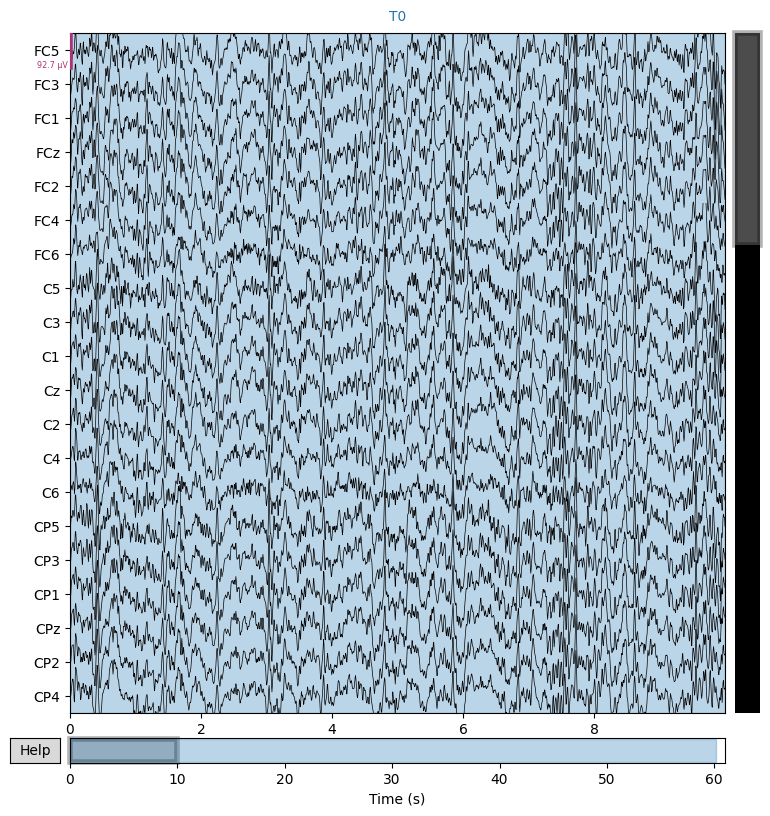

In [6]:
print(raw_1_1.info)
plot_raw(raw_1_1)

#### Plotting the mean amplitude of signals per channel

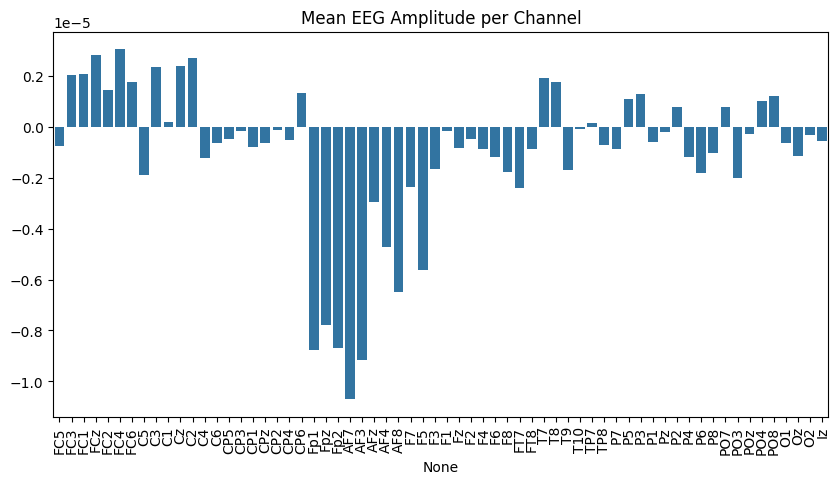

In [7]:
data, times = raw_1_1[:]
df = pd.DataFrame(data.T, columns=raw_1_1.ch_names)

# Plot mean amplitude per channel
df_mean = df.mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=df_mean.index, y=df_mean.values)
plt.title("Mean EEG Amplitude per Channel")
plt.xticks(rotation=90)
plt.show()

#### Plotting the Power Spectral Density of the signals

Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


c:\Users\souna\OneDrive\Desktop\My folders\ML_projects\BTP2\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


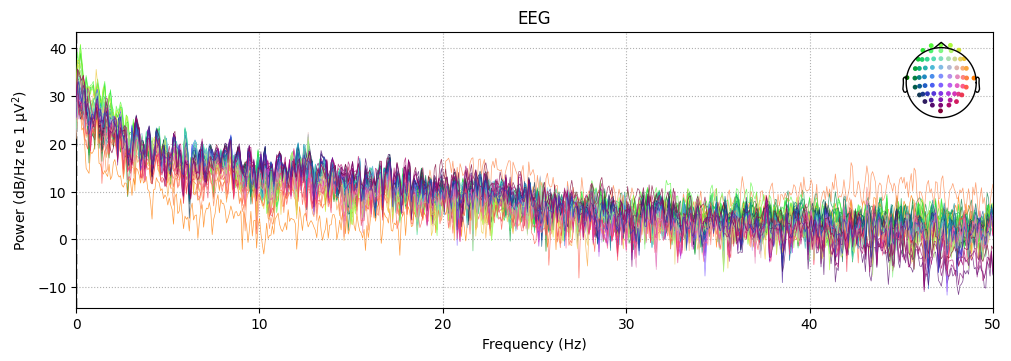

In [8]:
raw_1_1.compute_psd(fmax=50).plot(spatial_colors=True)

### Task 1 (open and close left and rights fists)

In [9]:
raw_1_2 = mne.io.read_raw_edf(edf_files[0][4], preload=True)
raw_1_2 = set_montage(raw_1_2)

Extracting EDF parameters from c:\Users\souna\OneDrive\Desktop\My folders\ML_projects\BTP2\eeg-motor-movementimagery-dataset-1.0.0\files\S001\S001R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


#### Plotting the EEG signals of the first 20 channels for a duration of 10 seconds

<Info | 9 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 529 samples (3.306 s)



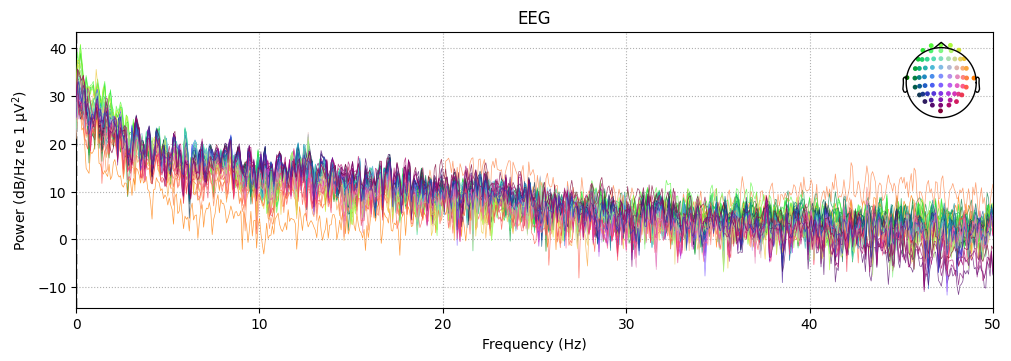

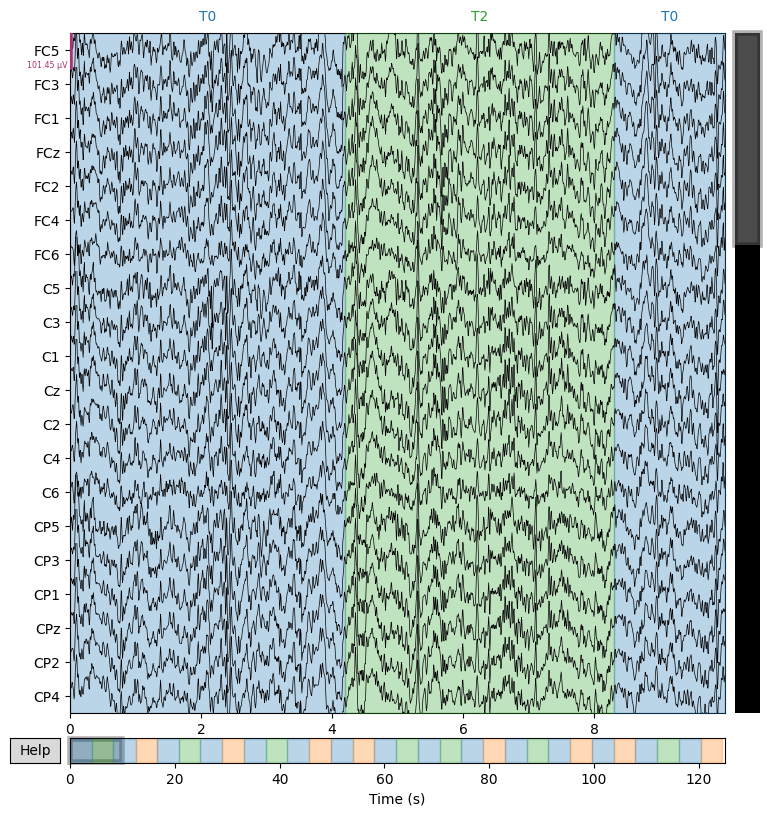

In [10]:
print(raw_1_2.info)
plot_raw(raw_1_2)

#### Plotting onset of events vs time

Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
{'rest': 1, 'both_fists': 2, 'both_feet': 3}


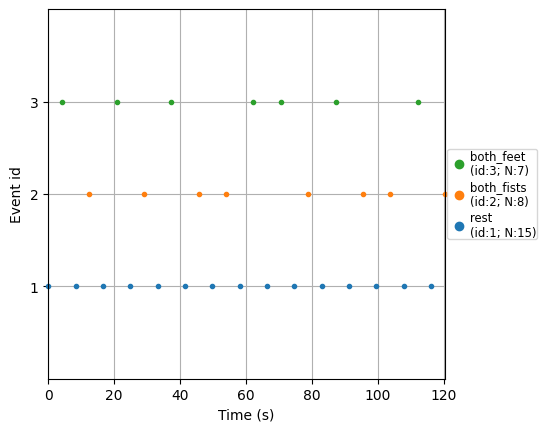

In [11]:
events, event_id = mne.events_from_annotations(raw_1_2)
# Remap event_id for clarity
event_id = {'rest': event_id['T0'], 'both_fists': event_id['T1'], 'both_feet': event_id['T2']}
print(event_id)
events_fig = mne.viz.plot_events(events, sfreq=raw_1_2.info['sfreq'], event_id=event_id)
plt.close(events_fig)

#### Plotting the mean amplitude of signals per channel

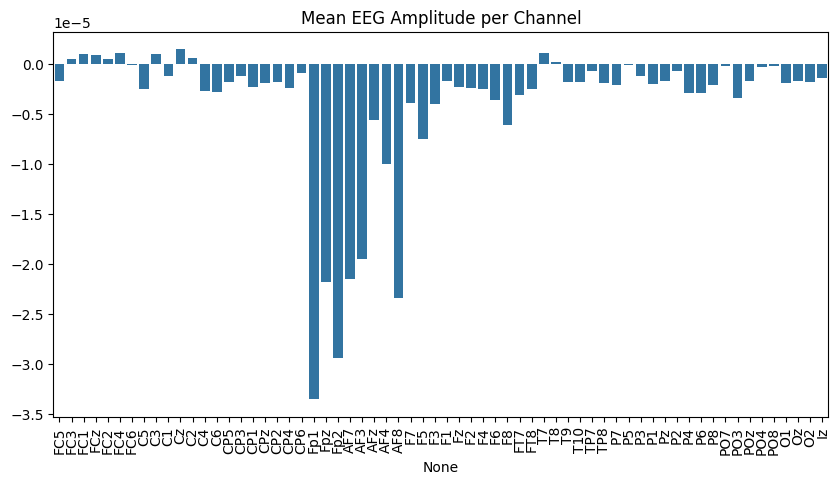

In [111]:
data, times = raw_1_2[:]
df = pd.DataFrame(data.T, columns=raw_1_2.ch_names)

# Plot mean amplitude per channel
df_mean = df.mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=df_mean.index, y=df_mean.values)
plt.title("Mean EEG Amplitude per Channel")
plt.xticks(rotation=90)
plt.show()

#### First 5 epochs of first 10 channels

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 801 original time points ...
1 bad epochs dropped
<Epochs | 29 events (all good), -1 – 4 s (baseline off), ~11.4 MiB, data loaded,
 'rest': 14
 'left_hand': 8
 'right_hand': 7>


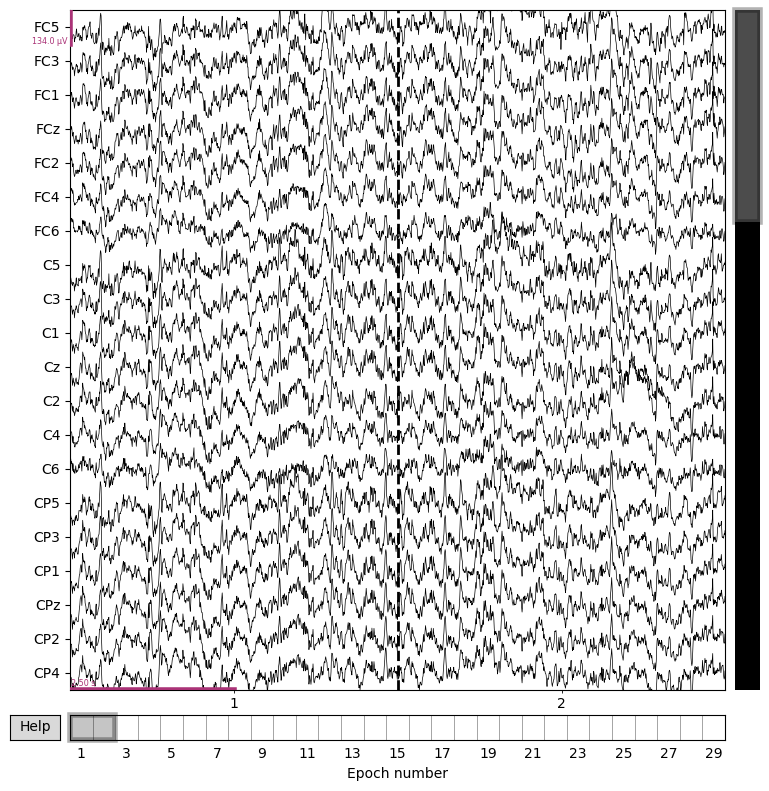

In [112]:
tmin, tmax = -1, 4  # 1s before and 4s after event
event_id = {
    'rest': 1,
    'left_hand': 2,
    'right_hand': 3
}

epochs = mne.Epochs(raw_1_2, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, preload=True)

print(epochs)
epochs_fig = epochs.plot(n_epochs=2, n_channels=20, title="First 5 Epochs (First 10 Channels)", scalings='auto')
plt.close(epochs_fig)

#### Power spectral density

Effective window size : 12.800 (s)


Plotting power spectral density (dB=True).


C:\Users\souna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


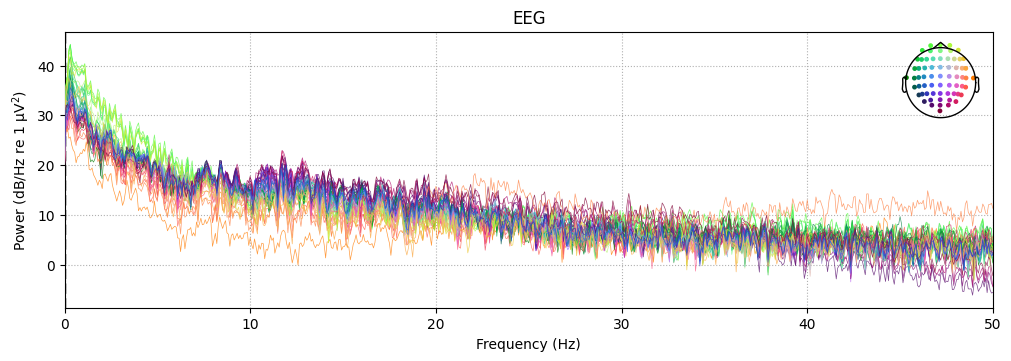

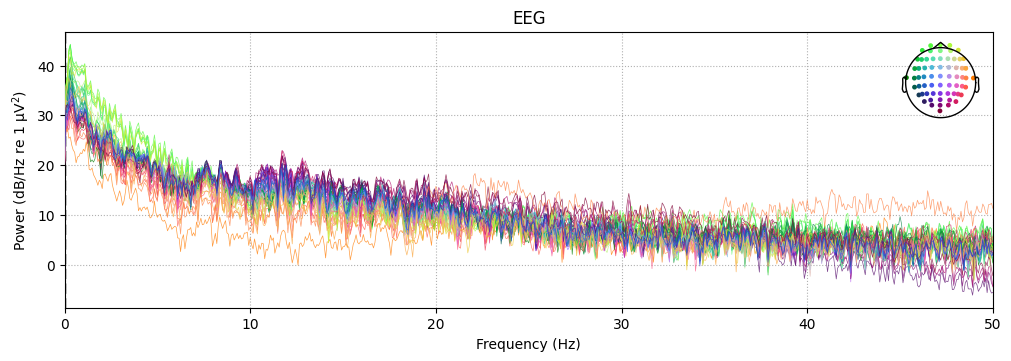

In [113]:
raw_1_2.compute_psd(fmax=50).plot(spatial_colors=True)

#### EEG plot and topo plot for opening and closing the left hand (T1)

No projector specified for this dataset. Please consider the method self.add_proj.


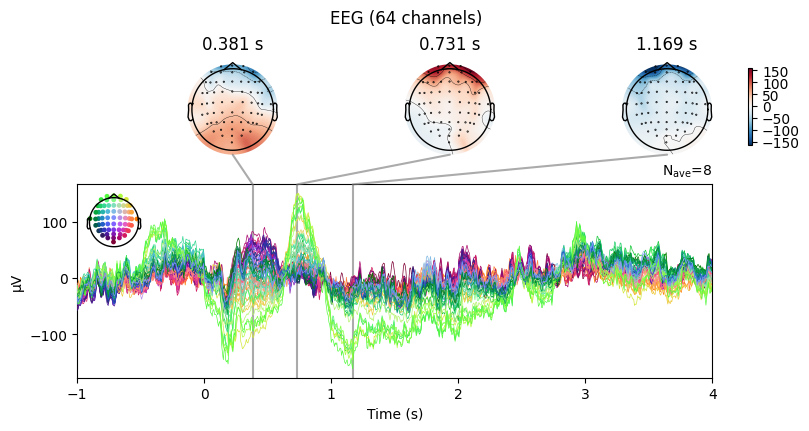

In [114]:
left_hand_fig = epochs['left_hand'].average().plot_joint()
plt.close(left_hand_fig)

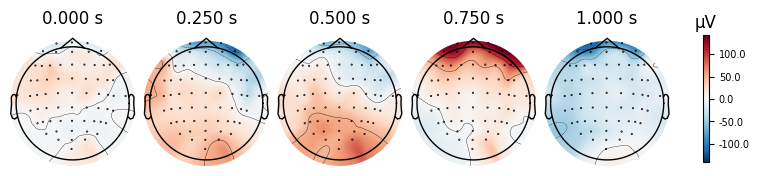

In [115]:
epochs_fig = epochs['left_hand'].average().plot_topomap(times=np.linspace(0.0, 1, 5), ch_type='eeg')
plt.close(epochs_fig)

#### EEG plot and topo plot for opening and closing the right hand (T2)

No projector specified for this dataset. Please consider the method self.add_proj.


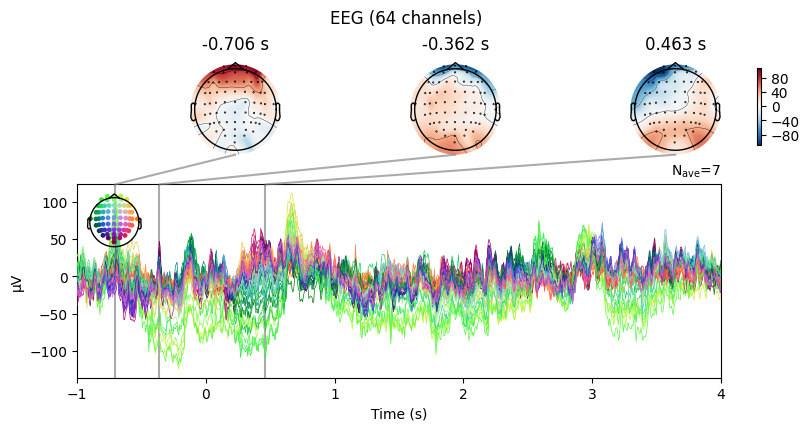

In [116]:
right_hand_fig = epochs['right_hand'].average().plot_joint()
plt.close(right_hand_fig)

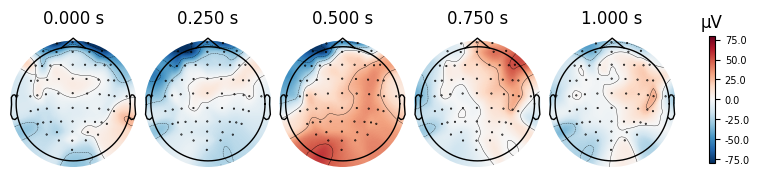

In [117]:
epochs_fig = epochs['right_hand'].average().plot_topomap(times=np.linspace(0.0, 1, 5), ch_type='eeg')
plt.close(epochs_fig)

### Task 2 (open and close both hands and feet)

In [118]:
raw_1_3 = mne.io.read_raw_edf(edf_files[0][4], preload=True)
raw_1_3 = set_montage(raw_1_3)

Extracting EDF parameters from C:\Users\souna\OneDrive\Desktop\My folders\ML_projects\BTP2\eeg-motor-movementimagery-dataset-1.0.0\files\S001\S001R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


#### Plotting onset of events vs time

Used Annotations descriptions: ['T0', 'T1', 'T2']
{'T0': 1, 'T1': 2, 'T2': 3}


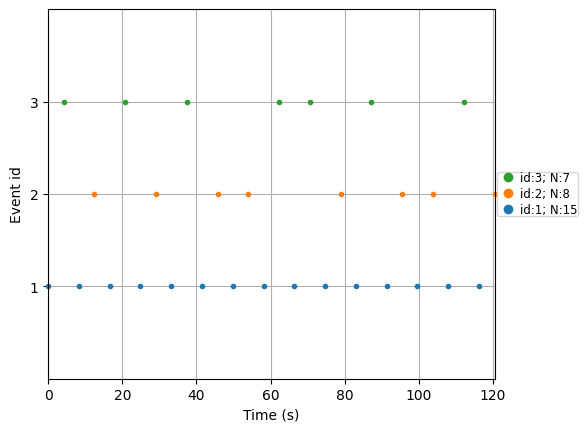

In [119]:
events, event_id = mne.events_from_annotations(raw_1_3)
print(event_id)
events_fig = mne.viz.plot_events(events, sfreq=raw_1_3.info['sfreq'])
plt.close(events_fig)

#### Plotting the mean amplitude of signals per channel

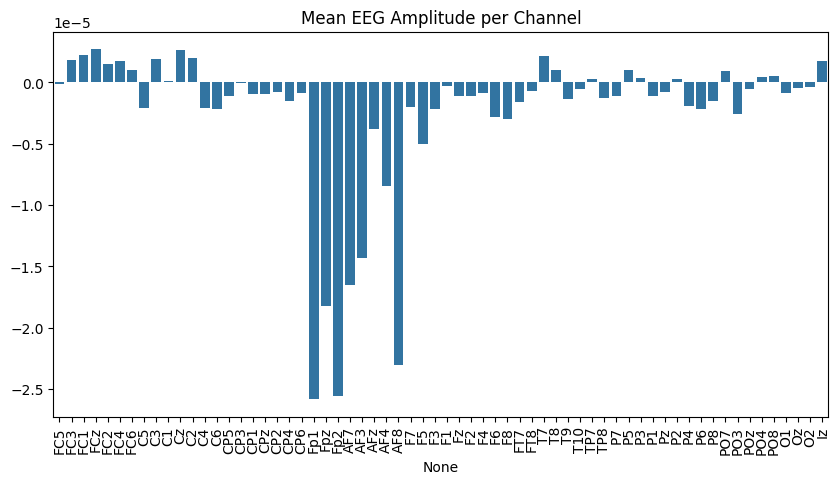

In [120]:
data, times = raw_1_3[:]
df = pd.DataFrame(data.T, columns=raw_1_3.ch_names)

# Plot mean amplitude per channel
df_mean = df.mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=df_mean.index, y=df_mean.values)
plt.title("Mean EEG Amplitude per Channel")
plt.xticks(rotation=90)
plt.show()

#### First 5 epochs of first 10 channels

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 801 original time points ...
1 bad epochs dropped
<Epochs | 29 events (all good), -1 – 4 s (baseline off), ~11.4 MiB, data loaded,
 'rest': 14
 'both_hands': 8
 'both_feet': 7>


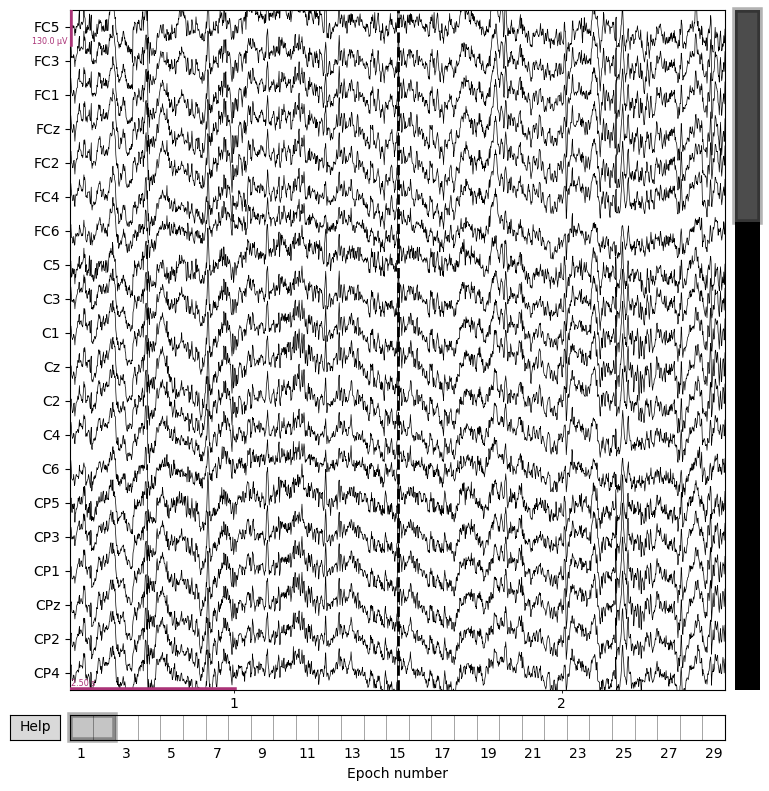

In [121]:
tmin, tmax = -1, 4  # 1s before and 4s after event
event_id = {
    'rest': 1,
    'both_hands': 2,
    'both_feet': 3
}

epochs = mne.Epochs(raw_1_3, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, preload=True)

print(epochs)
epochs_fig = epochs.plot(n_epochs=2, n_channels=20, title="First 5 Epochs (First 10 Channels)", scalings='auto')
plt.close(epochs_fig)

#### Power spectral density

Effective window size : 12.800 (s)


Plotting power spectral density (dB=True).


C:\Users\souna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


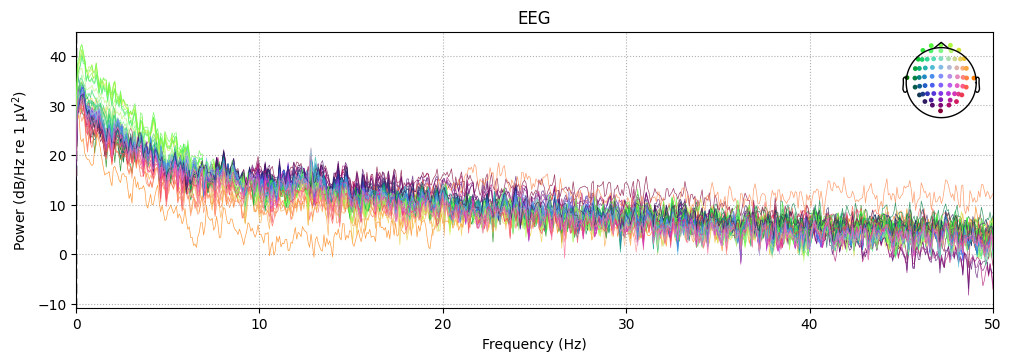

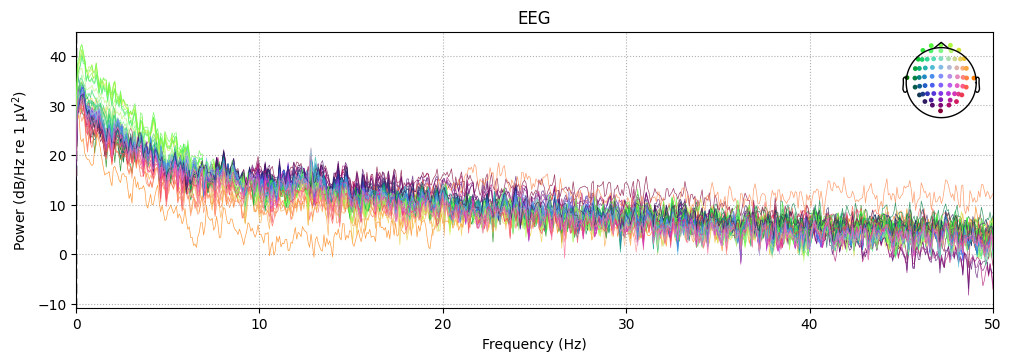

In [122]:
raw_1_3.compute_psd(fmax=50).plot(spatial_colors=True)

#### EEG plot and topo plot for opening and closing both fists (T1)

No projector specified for this dataset. Please consider the method self.add_proj.


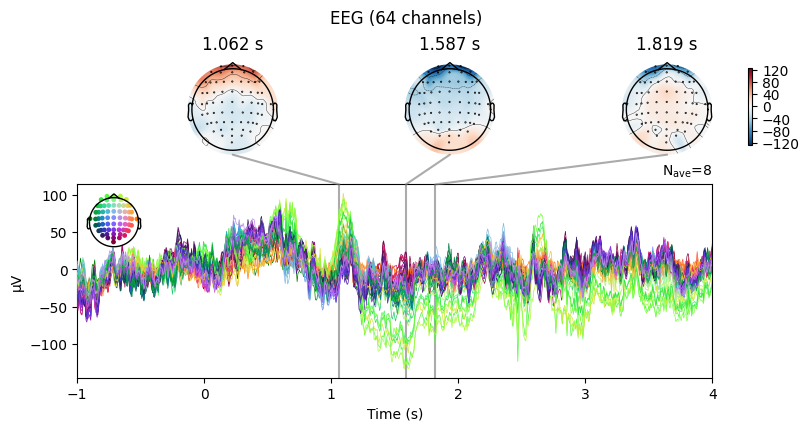

In [123]:
both_hands_fig = epochs['both_hands'].average().plot_joint()
plt.close(both_hands_fig)


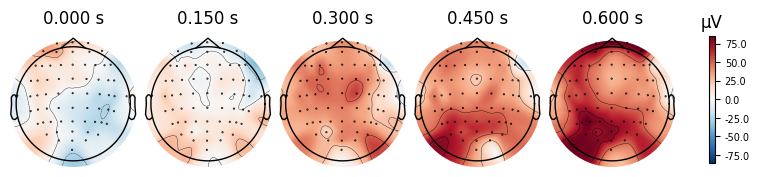

In [124]:
epochs_fig = epochs['both_hands'].average().plot_topomap(times=np.linspace(0.0, 0.6, 5), ch_type='eeg')
plt.close(epochs_fig)

#### EEG plot and topo plot for opening and closing both feet (T2)

No projector specified for this dataset. Please consider the method self.add_proj.


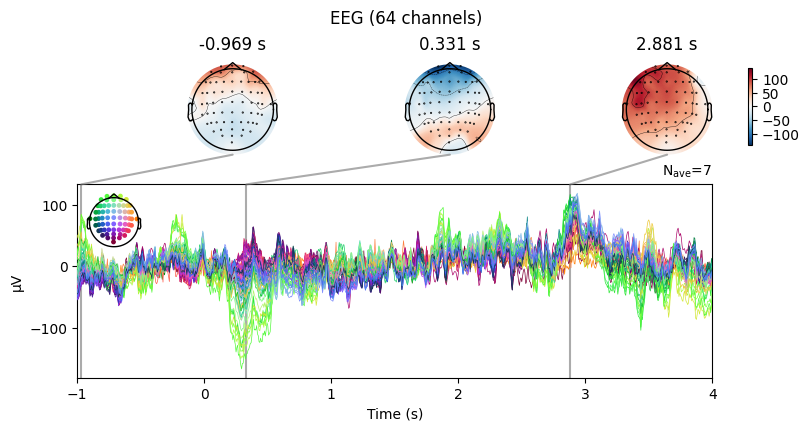

In [125]:
both_feet_fig = epochs['both_feet'].average().plot_joint()
plt.close(both_feet_fig)

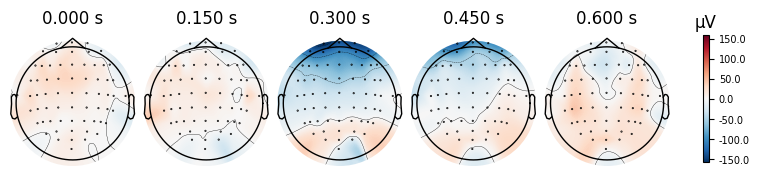

In [126]:
epochs_fig = epochs['both_feet'].average().plot_topomap(times=np.linspace(0.0, 0.6, 5), ch_type='eeg')
plt.close(epochs_fig)